In [83]:
# import the requests and BeautifulSoup modules
import requests
from bs4 import BeautifulSoup

def scrape_website(url, tag, **attributes):
    # Send a GET request to the URL
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code != 200:
        # If the request was unsuccessful, return an error message
        return "Error: Unable to retrieve page. Status code: " + str(response.status_code)
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    # Find all elements that match the tag and attributes
    elements = soup.find_all(tag, attributes)
    element_data_list = []  # Create a new list to store the dictionaries
    for element in elements:
        element_data = {
            'text': element.text,
            'metadata': {
                'attributes': {attr: element.get(attr) for attr in element.attrs},
                'parent_tag': element.find_parent().name if element.find_parent() else None,
                'url': url,
        }
    }
        element_data_list.append(element_data)  # Append to the new list
    return element_data_list  # Return the new list



# Scraping a page with job listings
We want to scrape the location of every IT related job listed in the greater Copenhagen area on this particular page

In [84]:
url = "https://www.jobindex.dk/jobsoegning/it/systemudvikling/storkoebenhavn"
tag = "span"
attributes = {"class": "jix_robotjob--area"}

# Call the function and store the results
results_with_metadata = scrape_website(url, tag, **attributes)

# Print the results
for item in results_with_metadata:
    print(f"Text: {item['text']}, Metadata: {item['metadata']}")

Text: Hellerup, Metadata: {'attributes': {'class': ['jix_robotjob--area']}, 'parent_tag': 'div', 'url': 'https://www.jobindex.dk/jobsoegning/it/systemudvikling/storkoebenhavn'}
Text: København S, Metadata: {'attributes': {'class': ['jix_robotjob--area']}, 'parent_tag': 'div', 'url': 'https://www.jobindex.dk/jobsoegning/it/systemudvikling/storkoebenhavn'}
Text: København K, Metadata: {'attributes': {'class': ['jix_robotjob--area']}, 'parent_tag': 'div', 'url': 'https://www.jobindex.dk/jobsoegning/it/systemudvikling/storkoebenhavn'}
Text: København S, Metadata: {'attributes': {'class': ['jix_robotjob--area']}, 'parent_tag': 'div', 'url': 'https://www.jobindex.dk/jobsoegning/it/systemudvikling/storkoebenhavn'}
Text: Herlev, Metadata: {'attributes': {'class': ['jix_robotjob--area']}, 'parent_tag': 'div', 'url': 'https://www.jobindex.dk/jobsoegning/it/systemudvikling/storkoebenhavn'}
Text: Frederiksberg, Metadata: {'attributes': {'class': ['jix_robotjob--area']}, 'parent_tag': 'div', 'url':

# Storing the data in a CSV file

In [86]:
import csv

# Specify the CSV file to write to
filename = 'data.csv'

# Open the file in write mode
with open(filename, 'w', newline='') as csvfile:
    # Create a CSV writer
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['Text', 'Metadata'])

    # Write the data rows
    for element in results_with_metadata:
        writer.writerow([element['text'], element['metadata']])

# Using panda to explore the data

In [87]:
import pandas as pd

# Specify the CSV file to read from
filename = 'data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(filename)

# Print the DataFrame
print(df)

                       Text                                           Metadata
0                  Hellerup  {'attributes': {'class': ['jix_robotjob--area'...
1               København S  {'attributes': {'class': ['jix_robotjob--area'...
2               København K  {'attributes': {'class': ['jix_robotjob--area'...
3               København S  {'attributes': {'class': ['jix_robotjob--area'...
4                    Herlev  {'attributes': {'class': ['jix_robotjob--area'...
5             Frederiksberg  {'attributes': {'class': ['jix_robotjob--area'...
6                    Søborg  {'attributes': {'class': ['jix_robotjob--area'...
7               København Ø  {'attributes': {'class': ['jix_robotjob--area'...
8              København SV  {'attributes': {'class': ['jix_robotjob--area'...
9                  Ballerup  {'attributes': {'class': ['jix_robotjob--area'...
10  Glostrup eller Aabenraa  {'attributes': {'class': ['jix_robotjob--area'...
11                København  {'attributes': {'class'

# Cleaning the data
One item turns up as 'Glostrup eller Aabenraa' - two different locations

In [88]:
# Make changes to a specific row
# For example, to change the row with index 10:
df.loc[10, 'Text'] = 'Glostrup'

# Write the DataFrame back to the CSV file
df.to_csv('data.csv', index=False)
print(df)

             Text                                           Metadata
0        Hellerup  {'attributes': {'class': ['jix_robotjob--area'...
1     København S  {'attributes': {'class': ['jix_robotjob--area'...
2     København K  {'attributes': {'class': ['jix_robotjob--area'...
3     København S  {'attributes': {'class': ['jix_robotjob--area'...
4          Herlev  {'attributes': {'class': ['jix_robotjob--area'...
5   Frederiksberg  {'attributes': {'class': ['jix_robotjob--area'...
6          Søborg  {'attributes': {'class': ['jix_robotjob--area'...
7     København Ø  {'attributes': {'class': ['jix_robotjob--area'...
8    København SV  {'attributes': {'class': ['jix_robotjob--area'...
9        Ballerup  {'attributes': {'class': ['jix_robotjob--area'...
10       Glostrup  {'attributes': {'class': ['jix_robotjob--area'...
11      København  {'attributes': {'class': ['jix_robotjob--area'...
12     Copenhagen  {'attributes': {'class': ['jix_robotjob--area'...
13       Ballerup  {'attributes': 

# Visualization 
Count and plot the data to see where in the greater CPH area the jobs occur

Text
Copenhagen       3
København S      2
Søborg           2
Ballerup         2
København        2
Hellerup         1
København K      1
Herlev           1
Frederiksberg    1
København Ø      1
København SV     1
Glostrup         1
København NV     1
Name: count, dtype: int64


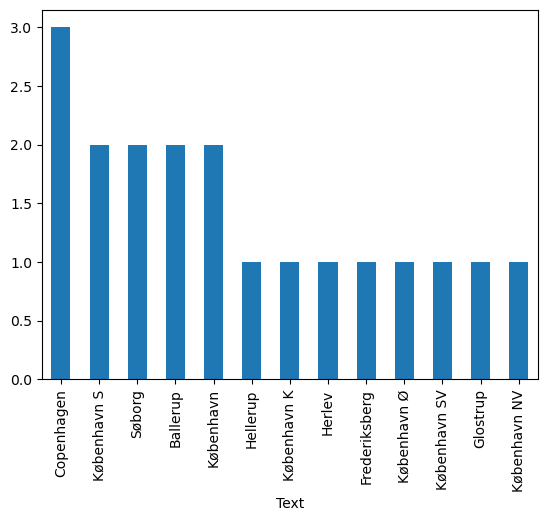

In [89]:
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame and 'Text' is the column you're interested in
counts = df['Text'].value_counts()

# Print the counts
print(counts)

# Plot the counts
counts.plot(kind='bar')

# Show the plot
plt.show()